In [14]:
#import datas.mnist_data as mnist_local
from data import input_data
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [15]:
# ignore future waring
from __future__ import division, print_function, absolute_import

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [16]:
# 트레이닝 파라메터
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000

In [17]:
# 네트워크 파라메터
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

In [19]:
# X(이미지)의 입력값(No labels, only pictures)
X = tf.placeholder(np.float32, [None, num_input]) # 무한대 x 784 행렬

In [20]:
# 모델의 wright와 bias의 배열값
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [21]:
# 인코더 설정
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

In [22]:
# 디코더 설정
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [23]:
# 모델 생성
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [24]:
# 예측값(디코더에서의 출력값)
y_pred = decoder_op

# 원래값(인코더로의 입력값)
y_true = X

In [30]:
# Loss Function 및 optimizer 설정
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [31]:
# 전체 변수 초기화 선언
init = tf.global_variables_initializer()

In [32]:
# TF session 시작
sess = tf.Session()

# initializer 실행
sess.run(init)

# 학습 시작
# 학습횟수(epoch = num_steps = 30000)
index_in_epoch = 0
for epoch in range(1, num_steps+1):    
    # batch_size 만큼 다음 mini batch를 가져옴
    X_images, _ = mnist.train.next_batch(batch_size)
    
    # 로그
    sess.run(optimizer, feed_dict={X: X_images})
    l = sess.run(loss, feed_dict={X: X_images})
    
#     # 다른 표기법
#     _, l = sess.run([optimizer, loss], feed_dict={X: X_images})
    
    # Display logs per step
    if epoch % display_step == 0 or epoch == 1:
        print('epoch %i: Minibatch Loss: %f' % (epoch, l))

print("학습완료! (loss : " + str(l) + ")")    
 

epoch 1: Minibatch Loss: 0.440927
epoch 1000: Minibatch Loss: 0.128922
epoch 2000: Minibatch Loss: 0.110636
epoch 3000: Minibatch Loss: 0.098086
epoch 4000: Minibatch Loss: 0.089551
epoch 5000: Minibatch Loss: 0.086123
epoch 6000: Minibatch Loss: 0.085282
epoch 7000: Minibatch Loss: 0.086080
epoch 8000: Minibatch Loss: 0.082343
epoch 9000: Minibatch Loss: 0.079212
epoch 10000: Minibatch Loss: 0.076779
epoch 11000: Minibatch Loss: 0.077592
epoch 12000: Minibatch Loss: 0.078567
epoch 13000: Minibatch Loss: 0.071999
epoch 14000: Minibatch Loss: 0.069645
epoch 15000: Minibatch Loss: 0.069451
epoch 16000: Minibatch Loss: 0.066823
epoch 17000: Minibatch Loss: 0.067145
epoch 18000: Minibatch Loss: 0.061373
epoch 19000: Minibatch Loss: 0.060000
epoch 20000: Minibatch Loss: 0.062541
epoch 21000: Minibatch Loss: 0.059077
epoch 22000: Minibatch Loss: 0.058113
epoch 23000: Minibatch Loss: 0.055861
epoch 24000: Minibatch Loss: 0.057144
epoch 25000: Minibatch Loss: 0.055262
epoch 26000: Minibatch Lo

Original Images


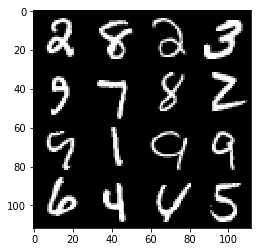

Reconstructed Images


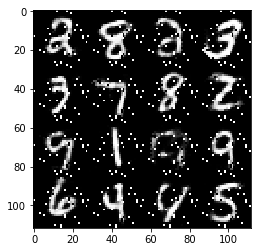

In [33]:
# 테스트 시작

n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(n):
    # MNIST test set
    test_X, _ = mnist.train.next_batch(batch_size)
    
    g = sess.run(decoder_op, feed_dict={X: test_X})

    # 원본 이미지를 가져와서 출력
    for j in range(n):
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = test_X[j].reshape([28, 28])
    # 재생성된 이미지를 가져와서 출력
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

# 테스트 결과 출력
print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()